In [55]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random

In [56]:
#optional cell if using drive:
#if using drive the file creeation will not work!
#from google.colab import drive
#drive.mount('/content/gdrive')



# Section 0: Getting data from million songs playlists

### How to use this notebook

1. Download it
2. Download and extract the million songs dataset (that leo sent via email) in the same directory as this notebook
3. Set the DIRECTORY in the cell below as the directory containing the dataset
4. You should then be able to run all of it

Section 1 is making a graph to figure out how the number of followers over all the playlists is distributed
Section 2 is removing all playlists from the dataset which have N or more fewer, and creating a new file containing playlists with only more than N followers
Section 3 is extracting N songs randomly from a given dataset, either randomly or with a weighted random distribution. You can set the constants to change the sampling method, number of songs, and the dataset you are computing over. If you use the default dataset to pick the songs, it is quite slow (takes like 10 minutes overall), so you may want to use a smaller dataset to choose these songs. I set the dataset to the dataset containing playlists with over 5 followers and it is significantly quicker to run. 

### IMPORTANT: Set the directory containing the data below

In [59]:
DIRECTORY = "spotify_million_playlist_dataset/data/"

### 1. Figuring out distribution of number of followers over playlists

This is just to figure out what the distribution of the followers looks like

In [3]:
# 1. Followers numbers
# 10,000 songs choose (Quanchi's link)


num_followers = []
directory = os.listdir(DIRECTORY)

for file in directory:

    f = open(DIRECTORY+file)
    data = json.load(f)


    for playlist in range(len(data['playlists'])):
        x = data['playlists'][playlist]['num_followers']
        num_followers += [x]

num_followers = pd.Series(num_followers)
num_followers.value_counts()


1        209801
2         41786
3         13018
4          5384
5          2616
          ...  
103           1
11618         1
361           1
107           1
767           1
Length: 298, dtype: int64

In [4]:
num_likes = {}

for val in num_followers:
    if val in num_likes:
        num_likes[val] += 1
    else:
        num_likes[val] = 1

keys = []
for key in num_likes.keys():
    keys += [key]

keys.sort()

X,y = [],[]

for key in keys:
    X +=[key]
    y +=[num_likes[key]]
    
    
#make the y-values a fraction of the size of the dataset
y_c = y     
for i in range(len(y_c)):
        y_c[i] = (y_c[i]+y_c[i-1])

for i in range(len(y_c)):
    y_c[i]/= 1000000

y_c


    
    

[0.209802,
 0.251588,
 0.264606,
 0.26999,
 0.272606,
 0.274084,
 0.274977,
 0.275548,
 0.275971,
 0.276227,
 0.276451,
 0.276635,
 0.276753,
 0.276852,
 0.276947,
 0.277024,
 0.277082,
 0.277153,
 0.277201,
 0.277236,
 0.277264,
 0.277289,
 0.277315,
 0.277344,
 0.27736,
 0.277382,
 0.277402,
 0.27742,
 0.277442,
 0.277454,
 0.277472,
 0.27749,
 0.2775,
 0.277515,
 0.277528,
 0.277545,
 0.277551,
 0.277563,
 0.277568,
 0.277574,
 0.27758,
 0.277583,
 0.277591,
 0.277599,
 0.277604,
 0.27761,
 0.277616,
 0.277626,
 0.277633,
 0.277636,
 0.277642,
 0.277648,
 0.277652,
 0.277657,
 0.277666,
 0.277668,
 0.277675,
 0.277681,
 0.277684,
 0.277685,
 0.277686,
 0.277689,
 0.277693,
 0.277696,
 0.277698,
 0.277699,
 0.2777,
 0.277701,
 0.277704,
 0.277705,
 0.277707,
 0.27771,
 0.277714,
 0.277716,
 0.277717,
 0.277718,
 0.277722,
 0.277723,
 0.277725,
 0.277728,
 0.27773,
 0.277731,
 0.277735,
 0.277738,
 0.277741,
 0.277745,
 0.277746,
 0.27775,
 0.277752,
 0.277753,
 0.277756,
 0.277757,
 

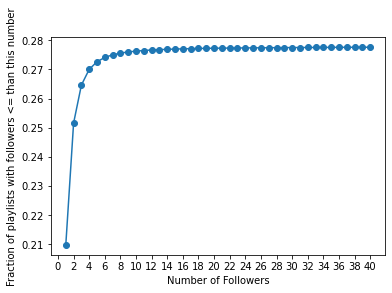

<Figure size 72x72 with 0 Axes>

In [5]:
#Plot

plt.plot(X[:40], y[:40],linestyle="-", marker="o")
plt.ylabel("Fraction of playlists with followers <= than this number")
plt.xlabel("Number of Followers")
plt.xticks(np.arange(0,41,2))
plt.show()
f = plt.figure()
f.set_figwidth(1)
f.set_figheight(1)

In [ ]:
print(1000000 - y_c[5]*1000000)


### 2. Cleaning the data (Method 1)

Removing all playlists with N or less followers 

In [58]:
N = 10
directory = os.listdir(DIRECTORY)

moreThanN = []

for file in directory:

    f = open(DIRECTORY+file)
    data = json.load(f)


    for playlist in range(len(data['playlists'])):
        if data['playlists'][playlist]['num_followers'] >N:  
            moreThanN += [data['playlists'][playlist]]

In [27]:
#sanity check

len(moreThanN)

1774

In [30]:
#Create results folder

path = os.getcwd()+"/generated_data"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs(path)
   print("The new directory is created!")

In [34]:
#SAVING DATA
#convert to dictionary 
moreThanN_dict = {"playlists": moreThanN}

json_object = json.dumps(moreThanN_dict, indent=4)
with open(path+"/moreThan"+str(N)+"followers.json", "w") as outfile:
    outfile.write(json_object)



In [57]:
edges = {} #will store edges
songs_dict = {} #assign a number to each song


f = open(path+"/moreThan"+str(N)+"followers.json")
data = json.load(f)
song_number = 0        
count = 0
for playlist in data['playlists']:
#     r = random.randint(1,100) #This line selects a random percent of all the playlists, in case the .edges file is too big still
#     if r<80:
#         continue
    edge_weight = playlist['num_followers']
    if (count % 100 == 0):
        print(count)
    count = count +1
    for track1 in playlist['tracks']:      
        
        
        for track2 in playlist['tracks']:
            
            if track1['track_name'] not in songs_dict:
                songs_dict[track1['track_name']] = str(count)
                count += 1
            if track2['track_name'] not in songs_dict:
                songs_dict[track2['track_name']] = str(count)
                count += 1
            
            t1 = songs_dict[track1['track_name']]
            t2 = songs_dict[track2['track_name']]
            
            if t1 != t2:  #if they are not the same track
                if (t1 + ' ' + t2) in edges:
                    edges[(t1 + ' ' + t2)] += edge_weight
                elif (t2 + ' ' + t1) in edges:
                    edges[(t2 + ' ' + t1)] += edge_weight
                else:
                    edges[(t1 + ' ' + t2)] = edge_weight

                    
print(len(edges))


                     
                 
                 
            
         


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fateh\\Desktop\\Math 168 Final Project/generated_data/moreThan1000followers.json'

In [36]:
#formatting stuff for .edges filef

data = ""

for key in edges:
    data+= (key + ' ' + str(edges[key])+'\n')

In [38]:
#writing the data

with open(path+"/moreThan"+str(N)+"followers.edges", "w") as outfile:
    outfile.write(data)

### 3. Cleaning the data (Method 2)

Selecting N songs randomly and performing an analysis on them

Change the constants in the cell below to change the kind of data you create

In [50]:
################# Constants #################
'''Rename this constant to the file containing the data, otherwise it will go through all of the data.
I recommend using a file generated by Method 1 as the specific file (for instance, moreThan10followers.json) since
the computation times will be much much faster'''
SPECIFIC_FILE = '' 

WEIGHTED_RANDOM = False   #If we want weighted random sampling or not
N = 1000  #number of songs to consider

############################################

In [40]:

#first we need to load all the songs into a dictionary so that we can randomly select N of them


all_tracks = {} #stores all the songs
count = 0 #progress bar


if SPECIFIC_FILE == '':
    directory = os.listdir(DIRECTORY)
    for file in directory:
        count +=1
        if (count %100 == 0):
            print(count)
        f = open(DIRECTORY+file)
        data = json.load(f)

        for playlist in data['playlists']:
            for track in playlist['tracks']:
                if track['track_name'] not in all_tracks:  #if it not in the dict then we add it to it and increase its weight
                    all_tracks[track['track_name']] = 1 #weight is used for weighted random sampling (if needed)
                else:
                    all_tracks[track['track_name']] +=1
                
############### TO LOOP OVER SOME SMALLER FILE ##################\
else:
    f = open(SPECIFIC_FILE)
    data = json.load(f)

    for playlist in data['playlists']:
        for track in playlist['tracks']:
            if track['track_name'] not in all_tracks:  #if it not in the dict then we add it to it and increase its weight
                all_tracks[track['track_name']] = 1 #weight is used for weighted random sampling (if needed)
            else:
                all_tracks[track['track_name']] +=1



In [41]:
print(list(all_tracks.keys())[0:20])

['Back In Your Head - Morgan Page Remix', 'Carry Me', 'I Was Married', 'Relief Next To Me', 'The Con', 'Knife Going In', 'Are You Ten Years Ago', 'Hop A Plane', 'Soil, Soil', 'Burn Your Life Down', 'Back In Your Head', 'Nineteen', 'Floorplan', 'Like O, Like H', 'Dark Come Soon', 'Call It Off', 'Alligator - Live', 'I Know I Know I Know - Live', 'Monday Monday Monday - Live', 'I Hear Noises - Live']


In [42]:
#get N songs based on weighted random sampling (no particular reason for this apart from probably giving a more connected NW)

if WEIGHTED_RANDOM == False:
    songs = random.choices(list(all_tracks.keys()), weights=None, k=N) 
else:
    songs = random.choices(list(all_tracks.keys()), weights=all_tracks.values(), k=N)

#Here we assign int indices to each song (to make the .edges file later we need nodes as int values)
temp = {}
index = 1
for song in songs:
    if song not in temp:
        temp[song] = index
        index +=1
songs = temp

print(songs)

{'Wheeled Walker - Ole Biege Remix': 1, 'Next Year - RAC Remix': 2, 'Age of Gods': 3, 'Ho Hey': 4, 'Celestica': 5, 'Edge of Seventeen - Early Take': 6, 'Little Love Affair': 7, "Wheels Rollin'": 8, 'Did I Let You Know': 9, 'Sirens (Parts 1 & 2)': 10, 'Drag Me Down / As Long as You Love Me (Mashup)': 11, 'Army - Live Album Version': 12, 'People Get Up And Drive Your Funky Soul - Remix': 13, "Goin' Home - Remix": 14, 'Burn It up All Night': 15, 'Paso Sin Ver': 16, 'Power in Prayer': 17, 'Some things Cosmic': 18, 'Balance - Joe Mason Remix': 19, 'Lucky': 20, 'Ali r u ok?': 21, 'Story': 22, 'Vivaldi: Concerto No. 10 in B Minor for 4 Violins and Cello, RV 580 (from "L’estro armonico", Op. 3): I. Allegro': 23, 'Starboy (Harder Better Faster Stronger Jersey Club)': 24, "I Can't Sleep Baby (If I) - Remix Radio Version": 25, 'Mas Que Nada': 26, 'Comfort You - Moods Remix': 27, 'Gimme That': 28, 'Flat World': 29, "When It's Springtime In Alaska (It's Forty Below)": 30, 'Warg-Scouts': 31, 'Rave T

In [43]:
#Now I want to create a list of shared playlists

shared_playlists = [] #this will contain items of the form (weight: [weight], tracks: [tracks]) for each playlist

count = 0 #Cosmetic, to show progress


if SPECIFIC_FILE == '':
    for file in directory:
        f = open(DIRECTORY+file) 
        data = json.load(f)

        for playlist in data['playlists']:  #parse through every playlist

            count+=1
            if (count%10000==0):
                print(count)

            num_followers = playlist['num_followers']

            temp = []

            for track in playlist['tracks']:
                if track['track_name'] in songs:
                    index = songs[track['track_name']]
                    if index not in temp:
                        temp.append(index)

            if (len(temp) >1): #only if a playlist has two or more of the 10k songs then we add it to our shared_playlists lits
                item = {'weight':num_followers, 'tracks':temp}
                shared_playlists.append(item)

else:
    
    f = open(SPECIFIC_FILE) 
    data = json.load(f)

    for playlist in data['playlists']:  #parse through every playlist

        count+=1
        if (count%10000==0):
            print(count)

        num_followers = playlist['num_followers']

        temp = []

        for track in playlist['tracks']:
            if track['track_name'] in songs:
                index = songs[track['track_name']]
                if index not in temp:
                    temp.append(index)

        if (len(temp) >1): #only if a playlist has two or more of the 10k songs then we add it to our shared_playlists lits
            item = {'weight':num_followers, 'tracks':temp}
            shared_playlists.append(item)

            
                

In [44]:
#create edges
edges = {}
count = 0
for item in shared_playlists:
    if (count%10000 == 0):
        print(count)
    count +=1
    weight = item['weight']
    tracks = item['tracks']
    for track1 in tracks:
        for track2 in tracks:
            if (track1 == track2):
                continue
            if (str(track1) + ' ' + str(track2)) in edges:
                edges[str(track1) + ' ' + str(track2)] += weight
            elif (str(track2) + ' ' + str(track1)) in edges:
                edges[str(track2) + ' ' + str(track1)] += weight
            else:
                edges[str(track1) + ' ' + str(track2)] = weight
            

0


In [45]:
data = ""

for key in edges:
    data+= (key + ' ' + str(edges[key])+'\n')

print(data) #sanity check

892 771 82
515 531 28
515 702 28
531 702 28
96 836 46
446 590 608
4 446 4282
4 793 24
847 263 122
847 329 122
263 329 122
476 839 90
476 796 22
476 208 746
476 655 22
839 796 1186
839 208 350
839 655 124
796 208 346
796 655 22
208 655 22
864 846 26
864 689 26
864 589 94
846 689 26
846 589 26
689 589 62
631 208 98
4 140 102
70 232 56
70 458 6092
232 458 138
128 494 56
202 683 166
284 676 58
284 503 588
676 503 22
458 839 1266
239 864 30
883 548 28
883 322 28
883 50 28
883 458 28
548 322 28
548 50 28
548 458 28
322 50 28
322 458 28
50 458 28
894 476 80
894 503 80
476 503 80
715 412 26
883 208 78
35 337 72
35 755 72
337 755 72
458 198 174
476 284 26
458 793 216
864 4 222
70 712 36
597 157 38
106 458 3832
202 446 26
796 589 22
796 864 22
626 187 38
627 20 30
813 4 34
864 334 11936
334 589 82
771 611 32
771 436 32
611 436 32
611 892 32
436 892 32
673 826 296
552 840 434
839 552 42
839 410 1088
839 840 312
552 410 42
552 476 488
410 840 114
410 476 68
840 476 532
795 20 82
4 919 104
4 589 24

In [46]:
#Create results folder

path = os.getcwd()+"/generated_data"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs(path)
   print("The new directory is created!")

In [49]:
#Writing the file

name = ""
if (WEIGHTED_RANDOM == True):
    name = str(N) + '_weighted'
else:
    name = str(N)

with open(path+'/'+name+"_random_songs.edges", "w") as outfile:
    outfile.write(data)
    
    
#The data should be saved in the same folder as this notebook

## Thoughts so far

- Selecting playlists above a certain number of likes produces a very dense network even with only the top 600~ networks
- Selecting 10k songs randomly produces a pretty sparse network with some intereseting communities
- Selecting 10k songs randomly with a weighted distribution produces an extremely dense network
- The clustering coefficient for 100 random weighted songs is small (0.04), but when we pick 500 random weighted songs it grows larger (0.34). For 10000 random songs it was like 0.99

# Section 2: Implementing algorithm to generate playlists

Here I'll try to create the playlists using the star graph recommendation method. For this I need two things - first is a recommendation algorithm based on the edges, and second is an easy way to iterate over song connections. 

### How this works:

First we consider the one node case. We feed a single node, call it node A, into the algorithm which gives us the subset of the network with one edge at A, which is a star graph. We store this star graph in a dictionary object. The next song to be recommended is one of the edges in this graph, randomly chosen with a weighted probability distribution. Call this song B. Now, we want the playlist that we are generating to be the center of the star graph. Now, we make the center of the star graph represent both nodes A and B. We add all the edges with end to B (except those with end A) from the original dataset to the star graph. If an edge already exists between the center and another node, and B is also connected with that node, the new weight of that edge becomes the sum of the weights of those edges. This is to implement familiarity. Continue this until the desired playlist size is reached. 




Running the two cells below will initialize the network. There are some constants at the start that you need to input

In [51]:
######################################### Constants

SPECIFIC_FILE = 'generated_data/moreThan10followers.json' #Rename this to something else if you want to only consider some other dataset, 
                    #otherwise we go over all data. specify the file name/path as the name
WEIGHTED_RANDOM = False   #If we want weighted random sampling or not
N = 1000  #number of songs to consider

In [52]:
######################################### LOADING SONGS FROM FILE
#first we need to load all the songs into a dictionary so that we can randomly select N of them


all_tracks = {} #stores all the songs
count = 0 #progress bar


f = open(SPECIFIC_FILE)
data = json.load(f)

for playlist in data['playlists']:
    for track in playlist['tracks']:
        if track['track_name'] not in all_tracks:  #if it not in the dict then we add it to it and increase its weight
            all_tracks[track['track_name']] = 1 #weight is used for weighted random sampling (if needed)
        else:
            all_tracks[track['track_name']] +=1


######################################### CHOOSING RANDOM SONGS

if WEIGHTED_RANDOM == False:
    songs = random.choices(list(all_tracks.keys()), weights=None, k=N)
else:
    songs = random.choices(list(all_tracks.keys()), weights=all_tracks.values(), k=N)

#print(songs)

######################################### CREATING SHARED PLAYLIST EDGES

shared_playlists = [] #this will contain items of the form (weight: [weight], tracks: [tracks]) for each playlist


f = open(SPECIFIC_FILE) 
data = json.load(f)

for playlist in data['playlists']:  #parse through every playlist

    num_followers = playlist['num_followers']
    temp = []
    for track in playlist['tracks']: #if one of the random songs is in the playlist then remember it
        if track['track_name'] in songs and track['track_name'] not in temp:
            temp.append(track['track_name'])

    if (len(temp) >1): #only if a playlist has two or more of the 10k songs then we add it to our shared_playlists lits
        item = {'weight':num_followers, 'tracks':temp}
        shared_playlists.append(item)


# #Here we create the big graph
edges = {}
relations = {} #this variable stores all of the node pairs in the graph. It is useful for the playlist-generation part of the notebook
for song in songs:
    relations[song] = set({})

for item in shared_playlists:
    
    weight = item['weight']
    tracks = item['tracks']
    for track1 in tracks:
        for track2 in tracks:
            if (track1 == track2):
                continue
            #now we add relations
            if track2 not in relations[track1]:
                relations[track1].add(track2)
            if track1 not in relations[track2]:
                relations[track2].add(track1)
                
            #now create edge and weight
            if (track1,track2) not in edges and (track2,track1) not in edges:
                edges[(track1,track2)] = weight
                edges[(track2,track1)] = weight
            else:
                edges[(track1,track2)] += weight
                edges[(track2,track1)] += weight


print("Some songs that were selected:")
print(songs[0:5])
print('\n')
print("Some of the edges that were created:")
print(list(edges.items())[0:5])
print('\n')
print("Some of the pairs of nodes in the graph:\n")
for n in range(5):
    i = random.randint(0,len(songs))
    print("Track:"+str(songs[i]))
    print("Tracks it is related to:")
    print(relations[songs[i]])
    print('\n')





Some songs that were selected:
["Conceited (There's Something About Remy)", "Lloyd, I'm Ready To Be Heartbroken", 'All Time', 'When I Think About The Lord', 'The Nameless One']


Some of the edges that were created:
[(('Use Somebody', 'Tattoo'), 26), (('Tattoo', 'Use Somebody'), 26), (("What's It To You", 'Kick A Little'), 138), (('Kick A Little', "What's It To You"), 138), (("What's It To You", "Nothin' But The Taillights"), 106)]


Some of the pairs of nodes in the graph:

Track:Kiss Me Last
Tracks it is related to:
{'Take What You Can Carry', 'Death Breath'}


Track:Dices
Tracks it is related to:
{'Tú Foto'}


Track:Hand Covers Bruise
Tracks it is related to:
set()


Track:The World's Best American Band
Tracks it is related to:
{"Ain't No Mountain High Enough", 'Revenge Complex'}


Track:I Put A Spell On You (Fifty Shades of Grey) - From The "Fifty Shades Of Grey" Soundtrack
Tracks it is related to:
{'If U Seek Amy'}




The cell below defines the function that we use

In [53]:
def recommend_song(stargraph, songs, alpha = 1):
    '''
    Function that will implement the recommend algorithm for a given input star graph. We are assigning weights to every 
    song in the number of songs we are operating over. The weight of each song will be the weight of the edge from it to the
    center of the stargraph (0 otherwise) + alpha. We will then make a weighted random prediction to get the next song.
    
    Parameters:
        stargraph: the input star graph. The first element is the nodes inside the graph and the second one is a dictionary 
        of node:weight pairs
        songslist: the list of songs over which we are operating
        alpha: value to give to every song to allow possible recommendation of songs without any edges (teleportation). 1 by default
  
  Returns:
       The predicted song
   '''
    weights = []
    for i in range(len(songs)):
        song = songs[i]
        weight = alpha
        if song in stargraph[1]: #if there is already an edge to it
            weight+= stargraph[1][song]
        if song in stargraph[0]: #if it is already in our playlist
            weight = 0
        weights.append(weight)
    nextsong = random.choices(songs, weights, k=1)[0] #return our weighted random choice
    #print (nextsong)
    return nextsong

def update_graph(stargraph, songToAdd, relations, edges):
    '''
    Function that will update the star graph to include edges that belong to the song to add. Returns updated star graph
    
    Parameters:
        stargraph: the input star graph. The first element is the nodes inside the graph and the second one is a dictionary 
        of node:weight pairs
        songToAdd: the song to add
        relations: the dictionary of all pairs in the graph
        edges: the original network with all the node pair relations
   
   Returns:
        The updated star graph
    '''
    relationsToAdd = relations[songToAdd] #give a set of all the pairs of nodes with the song to add
    stargraphNodes = stargraph[0]
    stargraphEdges = stargraph[1]
    
    for song in relationsToAdd: #go through each pair belonging to this song
        
        if song not in stargraphNodes:
            if song not in stargraphEdges:
                stargraphEdges[song] = edges[(song,songToAdd)] #add value of edge from the original network
            else:
                stargraphEdges[song] += edges[(song,songToAdd)]
                
    stargraph[0].add(songToAdd)
    return stargraph
    
    
def create_playlist(inputSongs, length,  songs, relations, edges,alpha = 1):
    '''
    Function that generates a recommendation playlist of length length based on an input of songs, and an input network
    
    Parameters:
    inputSongs: The input songs (list)
    length: Number of songs to add
    songs: List of all songs
    relations: Dictionary of all pair relations in the graph
    edges: The original network
    alpha: The teleportation probability in the recommendation algorithm
    '''
    stargraph = (set(), dict())
    
    for song in inputSongs: #build the star graph
        stargraph = update_graph(stargraph, song, relations, edges) 
    
    for i in range(length):
        newSong = recommend_song(stargraph, songs, alpha)
        stargraph = update_graph(stargraph, newSong, relations, edges)
    
    return list(stargraph[0])
    
    
            
        
        
    
    

## Using the algorithm

Finally, the cell below tests the algorithm

In [54]:
#Testing the algorithm

playlist = []
for i in range(3):
    playlist.append(songs[random.randint(0,len(songs))])
length = len(playlist)+10
print("Input songs:")
print(playlist)
playlist = create_playlist(playlist, length, songs, relations, edges)
print("Generated playlist:")
print(playlist)


Input songs:
['Maiden Voyage - 2002 Digital Remaster', 'Stay - Original Mix', 'Chemicals React Remix']
Generated playlist:
['Maiden Voyage - 2002 Digital Remaster', 'Stay - Original Mix', 'Oceans Away', "I Know It's Over - Live in London, 1986 [Extended Mix]", 'In Too Deep', 'Only For The Night', 'Long Day', 'Let Love In', 'Juju', 'Kryptonite', 'Song For My Father', 'Chemicals React Remix', 'September Song', "The Best of What's Around", 'The World Is New', 'Homegurl (He Gotta)']


### Thoughts on algorithm

I have no idea if these are great playlists or not lmao